Import

In [2]:
import cv2
import mediapipe as mp
from matplotlib import pyplot as plt
import json
import math
import time
import numpy as np

Data

In [3]:
# Load annotations file
json_file_path = "D:/coco_wholebody_val_v1.0.json"
with open(json_file_path, "r") as f:
    annotations = json.load(f)

# Load image file
annos = annotations["annotations"]


In [4]:
image_ids = []
temp = []
for anno in annos:
    if anno["num_keypoints"] == 17 or anno["image_id"] in image_ids:
        temp.append(anno["image_id"])
for anno in annos:
    if anno["image_id"] in temp:
        image_ids.append(anno["image_id"])
image_ids = [x for x in image_ids if image_ids.count(x) == 1]
len(image_ids)

82

In [5]:
image_path = "D:/val2017/"

In [7]:
image_paths = []
for  image_id in image_ids:
    image_name = str(image_id)
    for i in range(12-len(image_name)):
        image_name = "0"+image_name
    image_path = "D:/val2017/" + image_name + ".jpg"
    image_paths.append(image_path)
image_paths[10]

'D:/val2017/000000017905.jpg'

In [ ]:
len(image_paths)

82

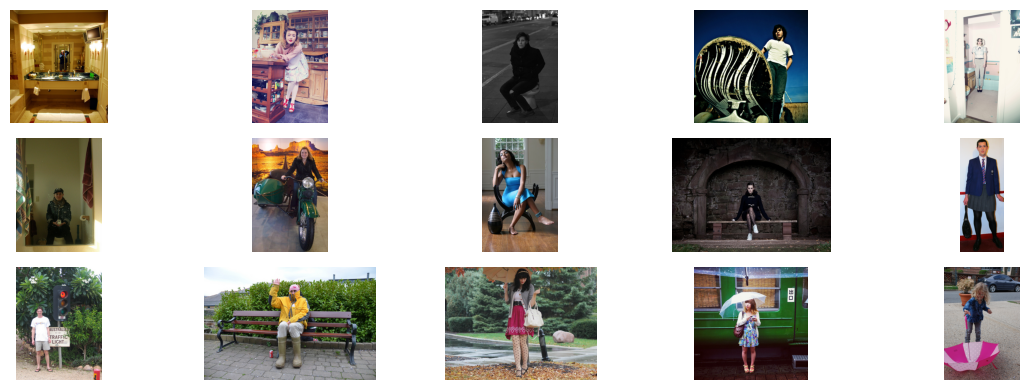

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(12, 4))

# Loop through the images and plot them
for i in range(15):
    # Read the image using OpenCV (replace with your image loading code)
    plt.subplot(3,5,i+1)

    image = cv2.imread(image_paths[i])
    
    # Convert BGR to RGB (if needed)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Display the image
    plt.imshow(image)
    
    # Remove axis labels and ticks
    plt.axis("off")

# Adjust layout to prevent clipping of axis labels
plt.tight_layout()

In [ ]:
test = []
for anno in annos:
    keypoints = []
    if anno["image_id"] in image_ids:
        keypoint_coords = anno["keypoints"]
        for i in range(0, len(keypoint_coords), 3):
            x = int(keypoint_coords[i])
            y = int(keypoint_coords[i + 1])
            keypoints.append([x,y])
        test.append(keypoints)
test[1]

[[220, 159],
 [233, 148],
 [206, 147],
 [247, 166],
 [186, 154],
 [255, 204],
 [150, 206],
 [196, 267],
 [152, 267],
 [134, 256],
 [179, 303],
 [253, 291],
 [196, 310],
 [248, 408],
 [223, 406],
 [229, 524],
 [200, 493]]

In [ ]:
len(test)

82

In [ ]:
indices = [0, 2, 5, 7, 8, 11, 12, 13, 14, 15, 16, 23, 24, 25, 26, 27, 28]
len(indices)

17

Load model

In [ ]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

In [ ]:
pred = []
for image_path in image_paths:
  with mp_pose.Pose(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as pose:
        image = cv2.imread(image_path)
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = pose.process(image)
        height, width, _ = image.shape
        keypoints = []
        for index in indices:
          if results.pose_landmarks != None:
            keypoints.append([results.pose_landmarks.landmark[index].x*width,results.pose_landmarks.landmark[index].y*height])
  pred.append(keypoints)

In [ ]:
pred[3]

[[474.97127532958984, 131.6248020529747],
 [486.42295837402344, 122.975770175457],
 [464.9723434448242, 124.09249180555344],
 [498.06957244873047, 130.71488530933857],
 [458.7818145751953, 132.66215912997723],
 [529.1975021362305, 209.08681493997574],
 [428.91735076904297, 187.33871832489967],
 [540.157356262207, 283.0165100991726],
 [386.23233795166016, 249.96564424037933],
 [509.9514389038086, 335.4404395222664],
 [405.02140045166016, 290.6046373844147],
 [490.9651184082031, 330.00537210702896],
 [432.498779296875, 321.6405100822449],
 [478.4544372558594, 464.94076627492905],
 [432.46490478515625, 444.89900279045105],
 [478.2168960571289, 585.380565226078],
 [445.4622268676758, 552.7666186094284]]

In [ ]:
len(pred)

82

PCK

In [ ]:
pck = []
for i in range(len(test)):
    if pred[i] != []:
        sum = 0
        for j in range(len(indices)):
            if math.sqrt((test[i][j][0]-pred[i][j][0])**2+(test[i][j][1]-pred[i][j][1])**2) < math.sqrt((test[i][6][0]-test[i][11][0])**2+(test[i][6][1]-test[i][11][1])**2)*0.05:
                sum = sum + 1
        pck.append(sum/len(indices))
    else:
        pck.append(0)

In [ ]:
len(pck)

82

In [ ]:
pck

[0,
 0.23529411764705882,
 0.4117647058823529,
 0.47058823529411764,
 0.6470588235294118,
 0.4117647058823529,
 0.47058823529411764,
 0.47058823529411764,
 0.47058823529411764,
 0.7647058823529411,
 0.8823529411764706,
 0.29411764705882354,
 0.35294117647058826,
 0.5294117647058824,
 0.5294117647058824,
 0.5882352941176471,
 0.5294117647058824,
 0.4117647058823529,
 0.5294117647058824,
 0,
 0,
 0.7058823529411765,
 0.4117647058823529,
 0.29411764705882354,
 0,
 0,
 0.6470588235294118,
 0.4117647058823529,
 0.29411764705882354,
 0.5882352941176471,
 0.29411764705882354,
 0.6470588235294118,
 0.5294117647058824,
 0.35294117647058826,
 0.5882352941176471,
 0.4117647058823529,
 0.17647058823529413,
 0.4117647058823529,
 0.058823529411764705,
 0.7058823529411765,
 0.35294117647058826,
 0.4117647058823529,
 0.4117647058823529,
 0.5294117647058824,
 0.23529411764705882,
 0.11764705882352941,
 0.6470588235294118,
 0.4117647058823529,
 0.35294117647058826,
 0.35294117647058826,
 0.6470588235294

In [ ]:
%store pck

Stored 'pck' (list)


Accuracy

In [ ]:
acc = []
for i in range(len(test)):
    if pred[i] != []:
        temp = []
        for j in range(len(indices)):
            if 1-(math.sqrt((test[i][j][0]-pred[i][j][0])**2+(test[i][j][1]-pred[i][j][1])**2))/(math.sqrt((test[i][6][0]-test[i][11][0])**2+(test[i][6][1]-test[i][11][1])**2)*0.2) > 0:
                temp.append(1-(math.sqrt((test[i][j][0]-pred[i][j][0])**2+(test[i][j][1]-pred[i][j][1])**2))/(math.sqrt((test[i][6][0]-test[i][11][0])**2+(test[i][6][1]-test[i][11][1])**2)*0.2))
            else:
                temp.append(0)
        acc.append(temp)
    else:
        acc.append([0]*17)

In [ ]:
acc

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0.901019915919752,
  0.8164248141704734,
  0.8116620291584085,
  0.7469034916414179,
  0.5955314514901215,
  0.7772776651818076,
  0.07957117534719949,
  0.23322061349857914,
  0.14489416218643636,
  0.35241350633039714,
  0,
  0,
  0,
  0.5610210940309663,
  0.28199998255099423,
  0.5118445325790384,
  0.45840090238338294],
 [0.7646580325047428,
  0.7421859669571638,
  0.86671886704607,
  0.935018247965852,
  0.6341430906304513,
  0.6966218980789018,
  0.8824434486015259,
  0.9324237938821754,
  0.21807321009185898,
  0.48349982362688715,
  0.3402739132400089,
  0.7745773801376357,
  0.33132873044275857,
  0.2660222672288899,
  0.9256099380674893,
  0.6792550914112061,
  0.6903377500669869],
 [0.82150442353376,
  0.8305370067004088,
  0.9390801194836035,
  0.8570331714461056,
  0.7177985309547372,
  0.9052391777051303,
  0.9725611317967742,
  0.9629516538355969,
  0.5967370506889025,
  0.7738247072741276,
  0.6422932675834813,
  

In [ ]:
mean_acc = []
acc2 = np.array(acc)
acc2 = np.transpose(acc2)
for i in range(len(acc2)):
    mean_acc.append(np.mean(acc2[i]))

In [ ]:
mean_acc

[0.7407737670381633,
 0.75810516664583,
 0.7468807247729925,
 0.7159600727182651,
 0.6250823394538695,
 0.6465867470350272,
 0.6488930044756138,
 0.5398310270997193,
 0.5776816097780513,
 0.5583957128084851,
 0.6242421412774705,
 0.4093614143819242,
 0.42000934820331753,
 0.4861453969568694,
 0.5236683303309666,
 0.45607069383595367,
 0.45095979642052747]

In [ ]:
%store mean_acc

Stored 'mean_acc' (list)


Precision + FPS + Processing time

In [ ]:
begin = time.time()
cap = cv2.VideoCapture("WIN_20240101_05_17_54_Pro.mp4")
pred = []
with mp_pose.Pose(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as pose:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      break

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image)
    height, width, _ = image.shape
    if results.pose_landmarks:
      # Center point
      center_width = ((results.pose_landmarks.landmark[11].x + results.pose_landmarks.landmark[12].x
              + (results.pose_landmarks.landmark[23].x + results.pose_landmarks.landmark[24].x)/2)/3 * width)
      center_height = ((results.pose_landmarks.landmark[11].y + results.pose_landmarks.landmark[12].y
              + (results.pose_landmarks.landmark[23].y + results.pose_landmarks.landmark[24].y)/2)/3 * height)
    pred.append([center_width, center_height])
end = time.time()

In [ ]:
overall_time = end - begin
overall_time

16.223364114761353

In [ ]:
len(pred)

472

In [ ]:
pred

[[328.9794158935547, 366.44901275634766],
 [329.4346618652344, 367.62179374694824],
 [329.72457249959314, 367.4681043624878],
 [330.1913706461588, 368.2634115219116],
 [330.3361129760742, 368.15356731414795],
 [330.5037307739258, 368.8909387588501],
 [330.48135121663415, 368.5703659057617],
 [330.5524571736654, 368.69340419769287],
 [330.4943688710531, 368.7431335449219],
 [330.48954010009766, 368.89381408691406],
 [330.38263956705725, 370.41844367980957],
 [330.0762176513672, 371.48799896240234],
 [330.05126953125, 371.8450355529785],
 [329.89226659139, 372.2002696990967],
 [329.72923278808594, 372.3387908935547],
 [329.13571993509925, 372.6528739929199],
 [328.8105010986328, 372.8946590423584],
 [328.6691919962565, 373.27101707458496],
 [328.6388460795084, 373.92897605895996],
 [328.5721174875895, 374.10058975219727],
 [328.5412470499674, 374.23946380615234],
 [328.42378298441565, 374.45348739624023],
 [328.26715787251794, 374.28515434265137],
 [328.1770006815592, 374.39295768737793]

In [ ]:
pred2 = np.array(pred)
pred2 = np.transpose(pred2)
std_x = np.std(pred2[0])
std_y = np.std(pred2[1])

In [ ]:
%store pred2

Stored 'pred2' (ndarray)


In [ ]:
std_x

4.531280100172073

In [ ]:
std_y

9.690886212410847

In [ ]:
fps = len(pred)/overall_time
int(fps)

29

In [ ]:
ptime = 1/fps
ptime

0.03437153414144355